In [98]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import copy
from shapely.geometry import box
import folium
from folium.plugins import HeatMap


In [99]:
df = pd.read_csv('Trips_2018.csv')

In [100]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime']) 

In [101]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [102]:
a = df[df.duplicated(subset=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], keep=False)]
if a.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(a)

Duplicate rows:
          Unnamed: 0  tripduration               starttime  \
0                  0           970 2018-01-01 13:50:57.434   
1                  1           723 2018-01-01 15:33:30.182   
2                  2           496 2018-01-01 15:39:18.337   
3                  3           306 2018-01-01 15:40:13.372   
4                  4           306 2018-01-01 18:14:51.568   
...              ...           ...                     ...   
17548334    17548334           734 2018-12-31 23:55:06.991   
17548335    17548335          2551 2018-12-31 23:55:44.307   
17548336    17548336          2376 2018-12-31 23:56:52.850   
17548337    17548337          2758 2018-12-31 23:58:29.212   
17548338    17548338          2459 2018-12-31 23:59:51.085   

                        stoptime  start_station_id  start_station_latitude  \
0        2018-01-01 14:07:08.186              72.0               40.767272   
1        2018-01-01 15:45:33.341              72.0               40.767272   
2    

In [103]:
df_dupli_removed = df.drop_duplicates(subset=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])

In [104]:
df_dupli_removed

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548062,17548062,1306,2018-12-31 20:52:14.611,2018-12-31 21:14:01.559,421.0,40.695734,-73.971297,386.0,40.714948,-74.002345,33933,Subscriber,1973,1
17548094,17548094,794,2018-12-31 21:09:49.751,2018-12-31 21:23:04.525,216.0,40.700379,-73.995481,350.0,40.715595,-73.987030,35727,Subscriber,1983,1
17548129,17548129,2892,2018-12-31 21:30:58.182,2018-12-31 22:19:10.771,3342.0,40.677775,-74.009461,3155.0,40.764400,-73.966490,34680,Subscriber,1976,2
17548258,17548258,934,2018-12-31 22:49:23.000,2018-12-31 23:04:57.315,3714.0,40.706842,-73.954435,436.0,40.682166,-73.953990,35706,Subscriber,1989,1


In [105]:
df_for_cluster_start = df.drop_duplicates(subset=['start_station_id'])  #819
df_for_cluster_end = df.drop_duplicates(subset=['end_station_id'])  #851

In [106]:
print(df_for_cluster_start.shape)
print(df_for_cluster_end.shape)

(819, 14)
(851, 14)


In [107]:
df_for_cluster_end  #contains all the 851 station IDs

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16180312,16180312,2474,2018-11-20 18:16:33.701,2018-11-20 18:57:47.796,448.0,40.756604,-73.997901,3279.0,40.721630,-74.049968,14697,Subscriber,1982,2
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2
17039630,17039630,634,2018-12-13 15:37:30.079,2018-12-13 15:48:04.767,3573.0,40.758058,-73.924275,3721.0,40.767549,-73.920933,35013,Subscriber,1982,2


In [108]:
start_stations = df_for_cluster_start['start_station_id'].unique()
end_stations = df_for_cluster_end['end_station_id'].unique()

In [109]:
print(start_stations)
print(end_stations)

[  72.   79.   82.   83.  119.  120.  127.  128.  143.  144.  146.  150.
  151.  152.  157.  161.  164.  167.  168.  173.  174.  195.  212.  216.
  217.  223.  228.  229.  232.  236.  237.  238.  239.  241.  242.  243.
  244.  245.  247.  248.  249.  251.  252.  253.  254.  257.  258.  259.
  260.  261.  262.  264.  265.  266.  267.  268.  270.  274.  275.  276.
  278.  279.  280.  281.  282.  284.  285.  289.  291.  293.  295.  296.
  297.  301.  302.  303.  304.  305.  306.  307.  308.  309.  310.  311.
  312.  313.  314.  315.  316.  317.  319.  320.  321.  322.  323.  324.
  325.  326.  327.  328.  330.  331.  332.  334.  335.  336.  337.  339.
  340.  341.  342.  343.  344.  345.  346.  347.  349.  350.  351.  353.
  354.  355.  356.  357.  358.  359.  360.  361.  362.  363.  364.  365.
  366.  368.  369.  372.  373.  376.  377.  379.  380.  382.  383.  385.
  386.  387.  388.  389.  390.  391.  392.  393.  394.  396.  397.  398.
  399.  400.  401.  402.  403.  405.  406.  407.  4

In [110]:
unique_values = np.union1d(start_stations, end_stations)
print(len(unique_values))
missing_values_array2 = np.setdiff1d(start_stations, end_stations)
print(missing_values_array2)

851
[nan]


In [111]:
def detect_outliers(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    outlier_threshold_low=Q1-1.5*IQR
    outlier_threshold_high=Q3+1.5*IQR
    outliers=(data[feature]<outlier_threshold_low)|(data[feature]>outlier_threshold_high)
    return outliers

outliers_trip_minutes=detect_outliers(df,'tripduration')
outliers_start_lat=detect_outliers(df,'start_station_latitude')
outliers_start_long=detect_outliers(df,'start_station_longitude')
outliers_end_lat=detect_outliers(df,'end_station_latitude')
outliers_end_long=detect_outliers(df,'end_station_longitude')

print(outliers_trip_minutes.sum())
print(outliers_start_lat.sum())
print(outliers_start_long.sum())
print(outliers_end_lat.sum())
print(outliers_end_long.sum())

824642
13027
389964
15108
396067


In [112]:
all_outliers=outliers_trip_minutes|outliers_start_lat|outliers_start_long|outliers_end_lat|outliers_end_long
dfc=df[~all_outliers]

In [113]:
dfc

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548330,17548330,312,2018-12-31 23:49:43.952,2018-12-31 23:54:56.251,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,17548331,165,2018-12-31 23:50:34.607,2018-12-31 23:53:20.583,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,17548332,1027,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,17548333,174,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1


In [114]:
df_for_cluster_end = dfc.drop_duplicates(subset=['end_station_id'])  #851
print(df_for_cluster_end.shape)
df_for_cluster_start = dfc.drop_duplicates(subset=['start_station_id'])
print(df_for_cluster_start.shape)

(734, 14)
(734, 14)


In [115]:
geometry = [Point(lon, lat) for lon, lat in zip(df_for_cluster_end['end_station_longitude'], df_for_cluster_end['end_station_latitude'])]
gdf = gpd.GeoDataFrame(df_for_cluster_end, geometry=geometry, crs='EPSG:4326')  # 'EPSG:4326' is the coordinate reference system (CRS) for lat/lon
gdf 

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,geometry
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.98848 40.74901)
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99468 40.75059)
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-74.00212 40.75594)
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.98516 40.76371)
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.98471 40.77467)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675552,15675552,268,2018-11-08 13:57:25.144,2018-11-08 14:01:53.760,3067.0,40.701666,-73.943730,3714.0,40.706842,-73.954435,34968,Subscriber,1980,1,POINT (-73.95444 40.70684)
15890014,15890014,217,2018-11-13 17:15:39.172,2018-11-13 17:19:16.646,3449.0,40.721463,-73.948009,3715.0,40.718170,-73.955201,30821,Subscriber,1984,1,POINT (-73.95520 40.71817)
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1,POINT (-73.97950 40.72746)
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2,POINT (-73.97381 40.68322)


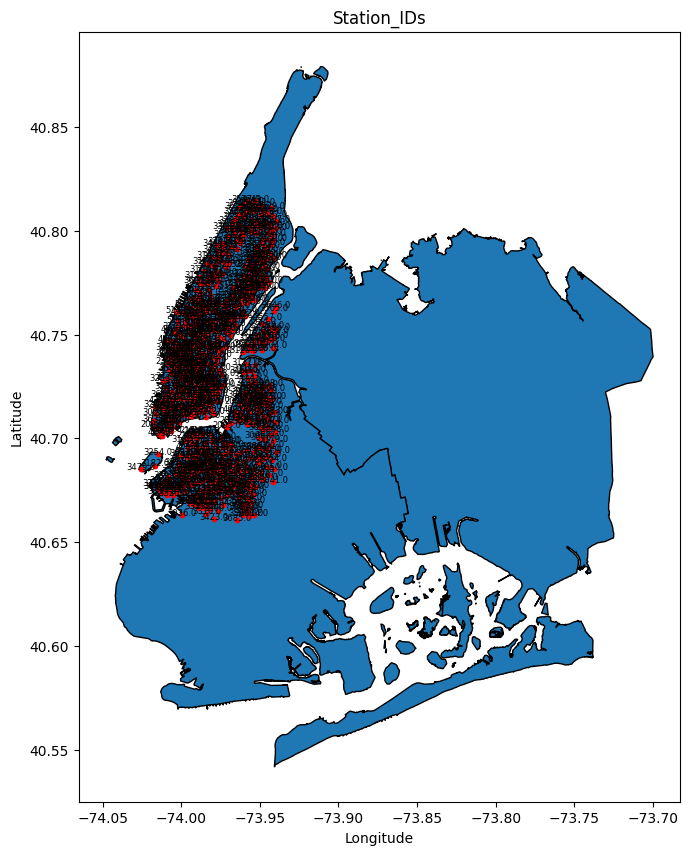

In [116]:
shapefile_p = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
ny = gpd.read_file(shapefile_p)

required_boro = [4.0, 1.0, 3.0] 
useful_ny = ny[ny['boro_code'].isin(required_boro)]
useful_ny

ax = useful_ny.plot(figsize=(10, 10), edgecolor='black')  #change later to show bigger image
gdf.plot(ax=ax, color='red', markersize=10)
for idx, row in gdf.iterrows():
    ax.annotate(text=row['end_station_id'], xy=(row['geometry'].x, row['geometry'].y), ha='center', fontsize=6)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Station_IDs')
plt.show()

# Clustering

In [117]:
gdf

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,geometry
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.98848 40.74901)
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99468 40.75059)
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-74.00212 40.75594)
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.98516 40.76371)
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.98471 40.77467)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675552,15675552,268,2018-11-08 13:57:25.144,2018-11-08 14:01:53.760,3067.0,40.701666,-73.943730,3714.0,40.706842,-73.954435,34968,Subscriber,1980,1,POINT (-73.95444 40.70684)
15890014,15890014,217,2018-11-13 17:15:39.172,2018-11-13 17:19:16.646,3449.0,40.721463,-73.948009,3715.0,40.718170,-73.955201,30821,Subscriber,1984,1,POINT (-73.95520 40.71817)
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1,POINT (-73.97950 40.72746)
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2,POINT (-73.97381 40.68322)


In [118]:
from sklearn.cluster import KMeans

points_array = gdf['geometry'].apply(lambda point: [point.x, point.y]).to_list()
points_np_array = np.array(points_array)
k = 25
kmeans = KMeans(n_clusters=k, random_state=5)
kmeans.fit(points_np_array)
gdf['cluster_labels'] = kmeans.labels_

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [119]:
gdf

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,geometry,cluster_labels
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.98848 40.74901),13
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99468 40.75059),19
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-74.00212 40.75594),19
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.98516 40.76371),4
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.98471 40.77467),14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675552,15675552,268,2018-11-08 13:57:25.144,2018-11-08 14:01:53.760,3067.0,40.701666,-73.943730,3714.0,40.706842,-73.954435,34968,Subscriber,1980,1,POINT (-73.95444 40.70684),15
15890014,15890014,217,2018-11-13 17:15:39.172,2018-11-13 17:19:16.646,3449.0,40.721463,-73.948009,3715.0,40.718170,-73.955201,30821,Subscriber,1984,1,POINT (-73.95520 40.71817),15
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1,POINT (-73.97950 40.72746),20
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2,POINT (-73.97381 40.68322),10


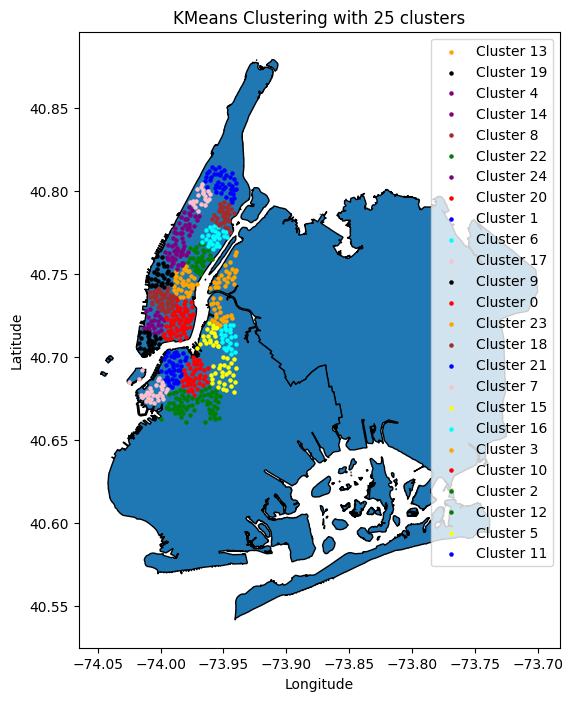

In [120]:
shapefile_p = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
ny = gpd.read_file(shapefile_p)

required_boro = [4.0, 1.0, 3.0] 
useful_ny = ny[ny['boro_code'].isin(required_boro)]
useful_ny

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'pink', 'brown', 'black']
cluster_colors = {label: colors[label % len(colors)] for label in gdf['cluster_labels'].unique()}

# Plot the shapefile as the base map
fig, ax = plt.subplots(figsize=(10, 8))
useful_ny.plot(ax=ax, edgecolor='black')

# Plot clusters with assigned colors
for label, color in cluster_colors.items():
    cluster_points = gdf[gdf['cluster_labels'] == label]
    cluster_points.plot(ax=ax, color=color, markersize=5, label=f'Cluster {label}')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'KMeans Clustering with {k} clusters')

# Show the plot with legend
plt.legend()
plt.show()

In [121]:
ny

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,4.0,Queens,3.041419e+09,888199.730955,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
3,1.0,Manhattan,6.365205e+08,357713.308660,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,3.0,Brooklyn,1.934138e+09,728148.532410,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


In [134]:
# Grouped the GeoDataFrame by 'cluster_labels' and count the number of stations in each cluster
cluster_station_counts = gdf.groupby('cluster_labels')['end_station_id'].count()

# Find the cluster label with the highest number of stations
max_stations_cluster = cluster_station_counts.idxmax()
max_station_count = cluster_station_counts[max_stations_cluster]

print(f"Cluster label with the highest number of stations: {max_stations_cluster}")
print(f"Number of stations in this cluster: {max_station_count}")
gdf

Cluster label with the highest number of stations: 8
Number of stations in this cluster: 42


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,geometry,cluster_labels
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.98848 40.74901),13
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99468 40.75059),19
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-74.00212 40.75594),19
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.98516 40.76371),4
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.98471 40.77467),14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675552,15675552,268,2018-11-08 13:57:25.144,2018-11-08 14:01:53.760,3067.0,40.701666,-73.943730,3714.0,40.706842,-73.954435,34968,Subscriber,1980,1,POINT (-73.95444 40.70684),15
15890014,15890014,217,2018-11-13 17:15:39.172,2018-11-13 17:19:16.646,3449.0,40.721463,-73.948009,3715.0,40.718170,-73.955201,30821,Subscriber,1984,1,POINT (-73.95520 40.71817),15
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1,POINT (-73.97950 40.72746),20
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2,POINT (-73.97381 40.68322),10


In [139]:
# Find the cluster label with the highest number of stations
largest_cluster_label = gdf['cluster_labels'].value_counts().idxmax()
# Filter the GeoDataFrame for the largest cluster
largest_cluster_df = gdf[gdf['cluster_labels'] == largest_cluster_label]
# Extract end_station_id values for stations in the largest cluster
end_station_ids_in_largest_cluster = largest_cluster_df['end_station_id'].tolist()
print("Station IDs in the largest cluster:")
print(end_station_ids_in_largest_cluster)
print(len(end_station_ids_in_largest_cluster))

Station IDs in the largest cluster:
[482.0, 127.0, 383.0, 358.0, 380.0, 382.0, 3224.0, 368.0, 435.0, 284.0, 336.0, 405.0, 3263.0, 161.0, 496.0, 345.0, 253.0, 3244.0, 223.0, 247.0, 238.0, 369.0, 293.0, 483.0, 285.0, 335.0, 357.0, 346.0, 229.0, 168.0, 252.0, 254.0, 3260.0, 280.0, 497.0, 3463.0, 3660.0, 3428.0, 3684.0, 3686.0, 3705.0, 3709.0]
42


In [143]:
dfc.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
dtype: object

In [145]:
end_station_ids_in_largest_cluster
filtered_stations = dfc[dfc[['start_station_id']].isin(end_station_ids_in_largest_cluster)]
filtered_stations

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548330,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17548331,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17548332,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17548333,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
largest_cluster_label = gdf['cluster_labels'].value_counts().idxmax()
largest_cluster_df = gdf[gdf['cluster_labels'] == largest_cluster_label]
#cluster 1 dataframe 
cluster_1_drop = dfc[dfc['end_station_id'].isin(end_station_ids_in_largest_cluster)]
cluster_1_pickups = dfc[dfc['start_station_id'].isin(end_station_ids_in_largest_cluster)]
dfc

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548330,17548330,312,2018-12-31 23:49:43.952,2018-12-31 23:54:56.251,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,17548331,165,2018-12-31 23:50:34.607,2018-12-31 23:53:20.583,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,17548332,1027,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,17548333,174,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1


In [29]:
cluster_1_pickups

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
4183,4183,1176,2018-01-01 01:11:58.481,2018-01-01 01:31:34.729,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,Subscriber,1979,2
4184,4184,1824,2018-01-01 01:12:26.474,2018-01-01 01:42:50.474,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,Subscriber,1969,1
4185,4185,613,2018-01-01 09:55:37.097,2018-01-01 10:05:50.697,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,Subscriber,1966,1
4186,4186,463,2018-01-01 10:27:30.491,2018-01-01 10:35:13.638,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,Subscriber,1992,1
4187,4187,454,2018-01-01 10:27:52.262,2018-01-01 10:35:26.884,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,Subscriber,1991,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548305,17548305,393,2018-12-31 23:25:09.589,2018-12-31 23:31:43.433,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,Subscriber,1957,2
17548311,17548311,426,2018-12-31 23:32:07.972,2018-12-31 23:39:14.375,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,Subscriber,1999,1
17548312,17548312,247,2018-12-31 23:32:26.251,2018-12-31 23:36:34.094,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,Subscriber,1989,1
17548313,17548313,282,2018-12-31 23:32:30.841,2018-12-31 23:37:13.352,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,Subscriber,1988,1


In [30]:
cluster_1_drop

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
5,5,1602,2018-01-01 21:31:54.192,2018-01-01 21:58:36.353,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,Subscriber,1968,1
11,11,1200,2018-01-02 10:23:18.880,2018-01-02 10:43:18.911,72.0,40.767272,-73.993929,127.0,40.731724,-74.006744,30257,Subscriber,1974,1
68,68,1365,2018-01-03 12:05:52.902,2018-01-03 12:28:38.437,72.0,40.767272,-73.993929,383.0,40.735238,-74.000271,31169,Subscriber,1969,1
80,80,1272,2018-01-03 16:31:21.284,2018-01-03 16:52:33.333,72.0,40.767272,-73.993929,358.0,40.732916,-74.007114,30515,Subscriber,1974,1
100,100,1571,2018-01-03 20:05:25.330,2018-01-03 20:31:36.565,72.0,40.767272,-73.993929,380.0,40.734011,-74.002939,32377,Subscriber,1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548303,17548303,271,2018-12-31 23:23:39.642,2018-12-31 23:28:11.018,280.0,40.733320,-73.995101,380.0,40.734011,-74.002939,26997,Subscriber,1994,1
17548312,17548312,247,2018-12-31 23:32:26.251,2018-12-31 23:36:34.094,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,Subscriber,1989,1
17548313,17548313,282,2018-12-31 23:32:30.841,2018-12-31 23:37:13.352,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,Subscriber,1988,1
17548329,17548329,798,2018-12-31 23:49:37.059,2019-01-01 00:02:55.164,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,Subscriber,1982,1


cluster_1_pickups, cluster_1_drop - are the trips from STATION IDs in cluster 1, not cleaned. <br>
They are taken from the original imported dataset <br>
columns in original dataset - 16196465 <br>
cluster_1_pickups - 1951108 <br>
cluster_1_drop - 1987834 <br>

In [31]:
cluster_1_drop_op = copy.deepcopy(cluster_1_drop)
cluster_1_pickups_op = copy.deepcopy(cluster_1_pickups)

# Later to be used for visualizations

In [163]:
cluster_1_pickups_IDs = cluster_1_pickups_op.groupby('start_station_id')[['start_station_latitude','start_station_longitude']].agg(list).reset_index()
cluster_1_drop_IDs = cluster_1_drop_op.groupby('end_station_id')[['end_station_latitude','end_station_longitude']].agg(list).reset_index()

In [164]:
cluster_1_pickups_IDs['start_station_latitude']=cluster_1_pickups_IDs['start_station_latitude'].str[0]
cluster_1_pickups_IDs['start_station_longitude']=cluster_1_pickups_IDs['start_station_longitude'].str[0]
cluster_1_drop_IDs['end_station_latitude']=cluster_1_drop_IDs['end_station_latitude'].str[0]
cluster_1_drop_IDs['end_station_longitude']=cluster_1_drop_IDs['end_station_longitude'].str[0]
print(cluster_1_drop_IDs)
print(cluster_1_pickups_IDs)

    end_station_id  end_station_latitude  end_station_longitude
0            127.0             40.731724             -74.006744
1            161.0             40.729170             -73.998102
2            168.0             40.739713             -73.994564
3            223.0             40.737815             -73.999947
4            229.0             40.727434             -73.993790
5            238.0             40.736197             -74.008592
6            247.0             40.735354             -74.004831
7            252.0             40.732264             -73.998522
8            253.0             40.735439             -73.994539
9            254.0             40.735324             -73.998004
10           280.0             40.733320             -73.995101
11           284.0             40.739017             -74.002638
12           285.0             40.734546             -73.990741
13           293.0             40.730207             -73.991026
14           335.0             40.729039

Cleaning the sorted data for cluster 1 <br>
cluster_1_"whatever"_op - is for operation dataset 

In [32]:
cluster_1_drop_op.drop('Unnamed: 0', axis=1, inplace=True)
cluster_1_drop_op.drop('usertype', axis=1, inplace=True)
cluster_1_drop_op.drop('gender', axis=1, inplace=True)

cluster_1_pickups_op.drop('Unnamed: 0', axis=1, inplace=True)
cluster_1_pickups_op.drop('usertype', axis=1, inplace=True)
cluster_1_pickups_op.drop('gender', axis=1, inplace=True)

In [33]:
cluster_1_drop_op['tripduration'] = cluster_1_drop_op['tripduration']/float(60)
cluster_1_pickups_op['tripduration'] = cluster_1_pickups_op['tripduration']/float(60)

In [34]:
cluster_1_drop_op['starttime'] = pd.to_datetime(cluster_1_drop_op['starttime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_drop_op['stoptime'] = pd.to_datetime(cluster_1_drop_op['stoptime'], format="%Y-%m-%d %H:%M:%S")

cluster_1_pickups_op['starttime'] = pd.to_datetime(cluster_1_pickups_op['starttime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_pickups_op['stoptime'] = pd.to_datetime(cluster_1_pickups_op['stoptime'], format="%Y-%m-%d %H:%M:%S")

In [35]:
cluster_1_drop_op['starttime'] = cluster_1_drop_op['starttime'].dt.floor('s')
cluster_1_drop_op['stoptime'] = cluster_1_drop_op['stoptime'].dt.floor('s')

cluster_1_pickups_op['starttime'] = cluster_1_pickups_op['starttime'].dt.floor('s')
cluster_1_pickups_op['stoptime'] = cluster_1_pickups_op['stoptime'].dt.floor('s')

In [36]:
cluster_1_drop_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
5,26.700000,2018-01-01 21:31:54,2018-01-01 21:58:36,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,1968
11,20.000000,2018-01-02 10:23:18,2018-01-02 10:43:18,72.0,40.767272,-73.993929,127.0,40.731724,-74.006744,30257,1974
68,22.750000,2018-01-03 12:05:52,2018-01-03 12:28:38,72.0,40.767272,-73.993929,383.0,40.735238,-74.000271,31169,1969
80,21.200000,2018-01-03 16:31:21,2018-01-03 16:52:33,72.0,40.767272,-73.993929,358.0,40.732916,-74.007114,30515,1974
100,26.183333,2018-01-03 20:05:25,2018-01-03 20:31:36,72.0,40.767272,-73.993929,380.0,40.734011,-74.002939,32377,1993
...,...,...,...,...,...,...,...,...,...,...,...
17548303,4.516667,2018-12-31 23:23:39,2018-12-31 23:28:11,280.0,40.733320,-73.995101,380.0,40.734011,-74.002939,26997,1994
17548312,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989
17548313,4.700000,2018-12-31 23:32:30,2018-12-31 23:37:13,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,1988
17548329,13.300000,2018-12-31 23:49:37,2019-01-01 00:02:55,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,1982


In [37]:
cluster_1_pickups_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
4183,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979
4184,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969
4185,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966
4186,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992
4187,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991
...,...,...,...,...,...,...,...,...,...,...,...
17548305,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957
17548311,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999
17548312,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989
17548313,4.700000,2018-12-31 23:32:30,2018-12-31 23:37:13,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,1988


In [38]:
print(cluster_1_pickups_op.dtypes)
print(cluster_1_drop_op.dtypes)

tripduration                      float64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
dtype: object
tripduration                      float64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
dtype: object


In [39]:
cluster_1_pickups_op = cluster_1_pickups_op.dropna(subset=['tripduration'])
cluster_1_drop_op = cluster_1_drop_op.dropna(subset=['tripduration'])

In [40]:
cluster_1_pickups_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
4183,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979
4184,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969
4185,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966
4186,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992
4187,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991
...,...,...,...,...,...,...,...,...,...,...,...
17548305,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957
17548311,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999
17548312,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989
17548313,4.700000,2018-12-31 23:32:30,2018-12-31 23:37:13,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,1988


In [41]:
cluster_1_drop_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year
5,26.700000,2018-01-01 21:31:54,2018-01-01 21:58:36,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,1968
11,20.000000,2018-01-02 10:23:18,2018-01-02 10:43:18,72.0,40.767272,-73.993929,127.0,40.731724,-74.006744,30257,1974
68,22.750000,2018-01-03 12:05:52,2018-01-03 12:28:38,72.0,40.767272,-73.993929,383.0,40.735238,-74.000271,31169,1969
80,21.200000,2018-01-03 16:31:21,2018-01-03 16:52:33,72.0,40.767272,-73.993929,358.0,40.732916,-74.007114,30515,1974
100,26.183333,2018-01-03 20:05:25,2018-01-03 20:31:36,72.0,40.767272,-73.993929,380.0,40.734011,-74.002939,32377,1993
...,...,...,...,...,...,...,...,...,...,...,...
17548303,4.516667,2018-12-31 23:23:39,2018-12-31 23:28:11,280.0,40.733320,-73.995101,380.0,40.734011,-74.002939,26997,1994
17548312,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989
17548313,4.700000,2018-12-31 23:32:30,2018-12-31 23:37:13,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,15624,1988
17548329,13.300000,2018-12-31 23:49:37,2019-01-01 00:02:55,518.0,40.747804,-73.973442,3709.0,40.738046,-73.996430,35603,1982


Took starttime as index for pickups and stoptime as index for drop

In [42]:
cluster_1_pickups_op.set_index('starttime', inplace=True, drop=False)
cluster_1_drop_op.set_index('stoptime', inplace=True, drop=False)

In [179]:
pickup_count = cluster_1_pickups_op.resample('M').size()
pickup_count = pickup_count.reset_index()
pickup_count.columns = ['Interval', 'Pickups']
pickup_count

,Interval,Pickups
0,2018-01-31,84464
1,2018-02-28,102469
2,2018-03-31,116654
3,2018-04-30,144131
4,2018-05-31,197644
5,2018-06-30,208930
6,2018-07-31,199429
7,2018-08-31,210365
8,2018-09-30,211786
9,2018-10-31,217299


In [44]:
drop_count = cluster_1_drop_op.resample('H').size()
drop_count = drop_count.reset_index()
drop_count.columns = ['Interval', 'Dropoffs']
drop_count

,Interval,Dropoffs
0,2018-01-01 00:00:00,5
1,2018-01-01 01:00:00,23
2,2018-01-01 02:00:00,7
3,2018-01-01 03:00:00,12
4,2018-01-01 04:00:00,5
...,...,...
8756,2018-12-31 20:00:00,15
8757,2018-12-31 21:00:00,4
8758,2018-12-31 22:00:00,13
8759,2018-12-31 23:00:00,3


In [45]:
cluster_1_pickups_op['hourly_interval'] = cluster_1_pickups_op['starttime'].dt.strftime('%Y-%m-%d %H')
grouped_data = cluster_1_pickups_op.groupby(['hourly_interval'])['starttime'].count().reset_index()
grouped_data.rename(columns={'starttime': 'pickup_count'}, inplace=True)
grouped_data

,hourly_interval,pickup_count
0,2018-01-01 00,16
1,2018-01-01 01,23
2,2018-01-01 02,10
3,2018-01-01 03,6
4,2018-01-01 04,3
...,...,...
8708,2018-12-31 19,25
8709,2018-12-31 20,11
8710,2018-12-31 21,5
8711,2018-12-31 22,5


In [46]:
df_station = pd.read_csv('stations.csv')    
df_station

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,YES,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,YES,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622)
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622)
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622)
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622)


In [146]:
geometry_bike = gpd.points_from_xy(cluster_1_pickups_op['start_station_longitude'], cluster_1_pickups_op['start_station_latitude'])
geo_bikes_pickup = gpd.GeoDataFrame(cluster_1_pickups_op, geometry=geometry_bike)
geo_bikes_pickup

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,hourly_interval,geometry
starttime,,,,,,,,,,,,,
2018-01-01 01:11:58,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979,2018-01-01 01,POINT (-74.00674 40.73172)
2018-01-01 01:12:26,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969,2018-01-01 01,POINT (-74.00674 40.73172)
2018-01-01 09:55:37,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966,2018-01-01 09,POINT (-74.00674 40.73172)
2018-01-01 10:27:30,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992,2018-01-01 10,POINT (-74.00674 40.73172)
2018-01-01 10:27:52,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991,2018-01-01 10,POINT (-74.00674 40.73172)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:25:09,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957,2018-12-31 23,POINT (-73.99800 40.73532)
2018-12-31 23:32:07,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999,2018-12-31 23,POINT (-74.00215 40.73039)
2018-12-31 23:32:26,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989,2018-12-31 23,POINT (-74.00027 40.73524)


In [48]:
geometry_stations = gpd.points_from_xy(df_station['Entrance Longitude'], df_station['Entrance Latitude'])
geo_station = gpd.GeoDataFrame(df_station, geometry=geometry_stations)
geo_station

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,...,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference,geometry
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,...,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995),POINT (-73.75418 40.60466)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066),POINT (-73.76196 40.59971)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066),POINT (-73.76181 40.59943)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066),POINT (-73.76160 40.59967)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,...,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398),POINT (-73.76831 40.59544)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622),POINT (-74.03070 40.61759)
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622),POINT (-74.03138 40.61602)
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622),POINT (-74.03040 40.61736)
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622),POINT (-74.03086 40.61589)


In [49]:
cluster_1_pickups_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,hourly_interval
starttime,,,,,,,,,,,,
2018-01-01 01:11:58,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979,2018-01-01 01
2018-01-01 01:12:26,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969,2018-01-01 01
2018-01-01 09:55:37,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966,2018-01-01 09
2018-01-01 10:27:30,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992,2018-01-01 10
2018-01-01 10:27:52,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991,2018-01-01 10
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:25:09,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957,2018-12-31 23
2018-12-31 23:32:07,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999,2018-12-31 23
2018-12-31 23:32:26,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989,2018-12-31 23


<AxesSubplot: >

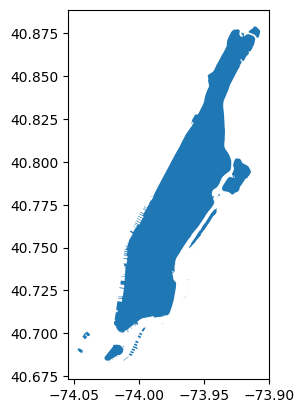

In [50]:
from shapely.geometry import box

newyork = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
gdf = gpd.read_file(newyork)
min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])
bbox = box(min_lon, min_lat, max_lon, max_lat)
gdf_filtered = gdf[gdf.geometry.intersects(bbox)]
gdf_filtered.plot()


(40.72706363348306, 40.74173969)

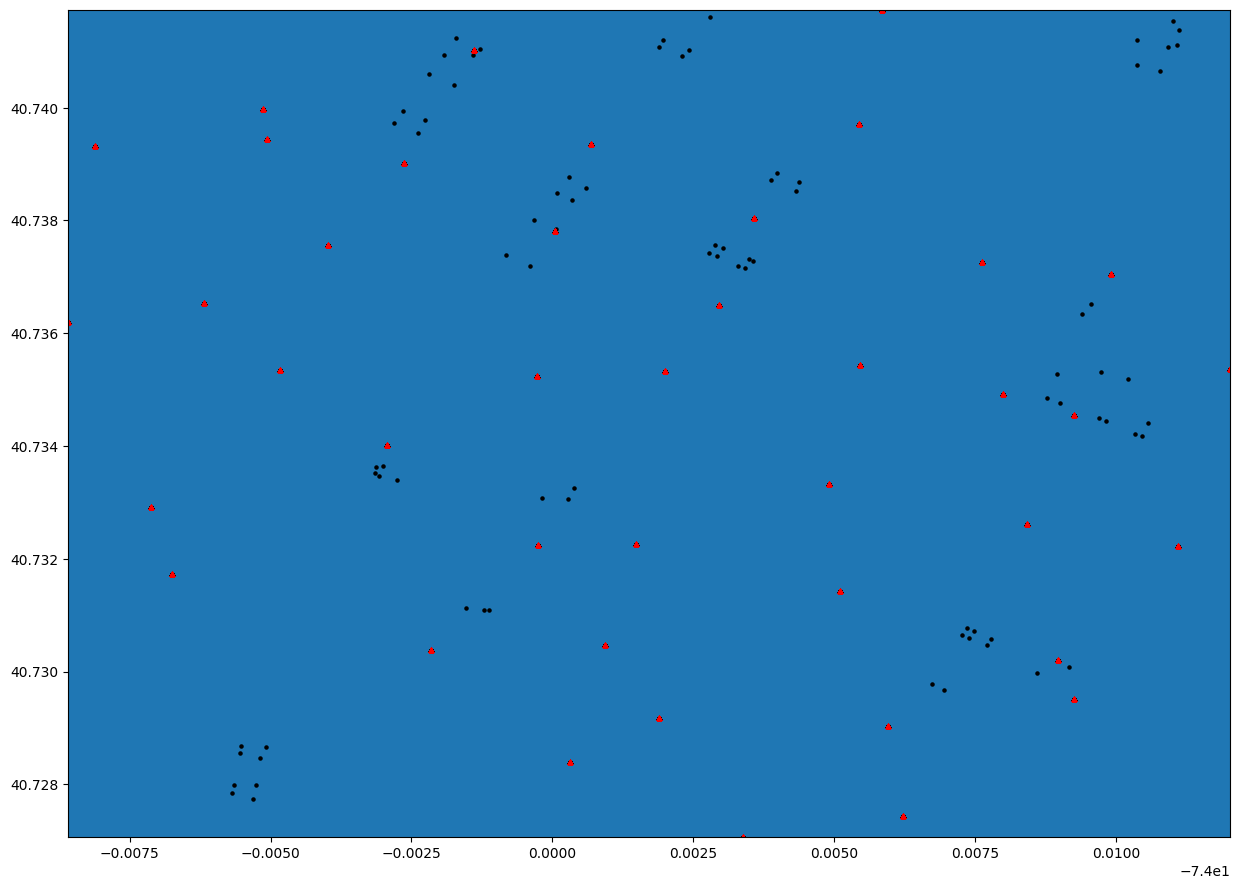

In [147]:

newyork = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
gdf = gpd.read_file(newyork)
min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])
bbox = box(min_lon, min_lat, max_lon, max_lat)
gdf_filtered = gdf[gdf.geometry.intersects(bbox)]
ax=gdf_filtered.plot(figsize=(15,15))

geo_station.plot(ax=ax, marker='o', color='black', markersize=5)
geo_bikes_pickup.plot(ax=ax,marker='^', color='red', markersize=8)
plt.xlim((min(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_longitude'])))
plt.ylim((min(cluster_1_pickups_op['start_station_latitude']), max(cluster_1_pickups_op['start_station_latitude'])))

In [57]:
cluster_1_pickups_op
csv_out = 'cluster_1.csv'
df.to_csv(csv_out)

In [53]:
m=folium.Map(location=[40.70986392898603, -74.01127897004845], zoom_start=10)
heat_m =folium.Map(location=[40.70986392898603, -74.01127897004845], zoom_start=10)

In [54]:
for index, row in cluster_1_pickups_op.iterrows():
    folium.CircleMarker([row['start_station_latitude'], row['start_station_longitude']], radius=10, pop_up=row['start_station_id'], fill_color = "red").add_to(m)

In [177]:
#heatmap for all year cluster 1

heat_m_pickups = cluster_1_pickups_op[['start_station_latitude','start_station_longitude']].to_numpy()
HeatMap(heat_m_pickups).add_to(heat_m)

for index, row in df_station.iterrows():
    if min_lon <= row['Entrance Longitude'] <= max_lon and min_lat <= row['Entrance Latitude'] <= max_lat:
        station_ID = str(row['Station Name'])
        folium.Marker(
            [row['Entrance Latitude'], row['Entrance Longitude']],
            popup=folium.Popup(station_ID, parse_html=True)
        ).add_to(heat_m)


In [65]:
cluster_1_pickups_op

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,hourly_interval
starttime,,,,,,,,,,,,
2018-01-01 01:11:58,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979,2018-01-01 01
2018-01-01 01:12:26,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969,2018-01-01 01
2018-01-01 09:55:37,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966,2018-01-01 09
2018-01-01 10:27:30,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992,2018-01-01 10
2018-01-01 10:27:52,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991,2018-01-01 10
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:25:09,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957,2018-12-31 23
2018-12-31 23:32:07,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999,2018-12-31 23
2018-12-31 23:32:26,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989,2018-12-31 23


In [92]:
grouped = cluster_1_pickups_op.groupby(cluster_1_pickups_op['starttime'].dt.month)
cluster_1_pickups_op_monthly = {month: grouped.get_group(month) for month in cluster_1_pickups_op['starttime'].dt.month.unique()}


In [199]:
cluster_1_pickups_op_monthly[1]

grouped = cluster_1_pickups_op.groupby(cluster_1_pickups_op['starttime'].dt.month)
pickup_count_per_station_month = {
    month: grouped.get_group(month).groupby('start_station_id').size().reset_index(name='Pickups')
    for month in cluster_1_pickups_op['starttime'].dt.month.unique()
}
pickup_count_per_station_month[2]

,start_station_id,Pickups
0,127.0,2849
1,161.0,2934
2,168.0,3432
3,223.0,1698
4,229.0,4055
5,238.0,1374
6,247.0,959
7,252.0,1609
8,253.0,2383
9,254.0,1506


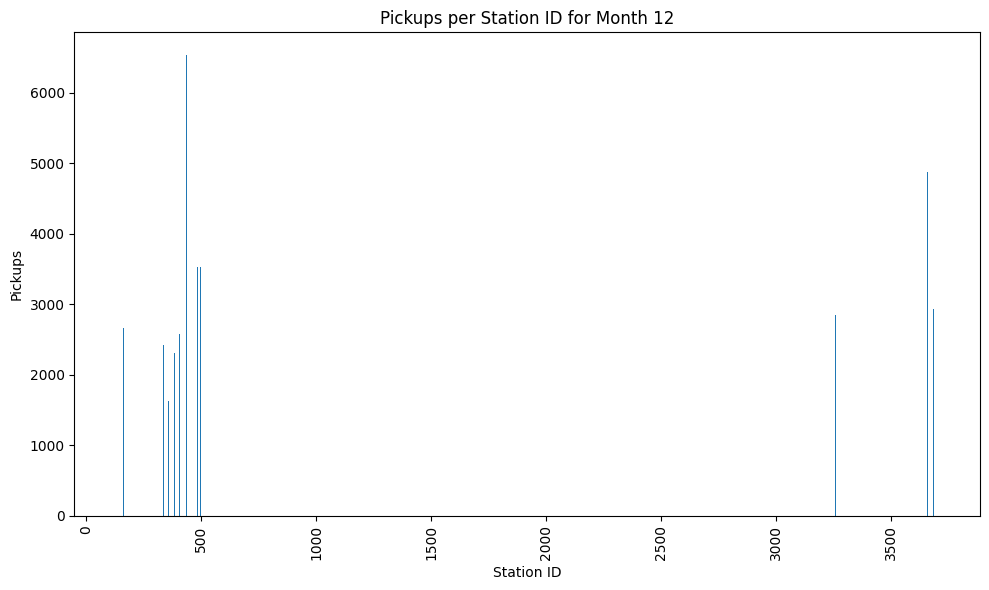

In [198]:
import matplotlib.pyplot as plt

# Assuming you want to plot pickups for month 1 (January)
month_to_plot = 12  # Change this value to plot a different month

# Get the DataFrame for the specified month
data_for_month = pickup_count_per_station_month[month_to_plot]

# Plot a bar graph
plt.figure(figsize=(10, 6))
plt.bar(data_for_month['start_station_id'], data_for_month['Pickups'])
plt.xlabel('Station ID')
plt.ylabel('Pickups')
plt.title(f'Pickups per Station ID for Month {month_to_plot}')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()

# Show the plot
plt.show()


In [171]:
df_station

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,YES,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,YES,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622)
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622)
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622)
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622)


# January

In [184]:
#change variable in cluster_1_pickups_op_monthly[x] here to view for each month 
january = cluster_1_pickups_op_monthly[12]
heat_m_pickups = january[['start_station_latitude','start_station_longitude']].to_numpy()
HeatMap(heat_m_pickups).add_to(heat_m)
for index, row in cluster_1_pickups_IDs.iterrows():
    station_ID = str(row['start_station_id'])
    folium.Marker([row['start_station_latitude'], row['start_station_longitude']],
                  popup=folium.Popup(station_ID, parse_html=True)).add_to(heat_m)

min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])


for index, row in df_station.iterrows():
    if min_lon <= row['Entrance Longitude'] <= max_lon and min_lat <= row['Entrance Latitude'] <= max_lat:
        station_ID = str(row['Station Name'])
        folium.Marker(
            [row['Entrance Latitude'], row['Entrance Longitude']],
            popup=folium.Popup(station_ID, parse_html=True)
        ).add_to(heat_m)


heat_m.save("december.html")

#change entrance GPS to station GPS